In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\Therton_F\Downloads\DA\Python\Superstore_USA.xlsx")
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [3]:
df.shape

(9426, 24)

In [4]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [5]:
df['Product Base Margin'].fillna(df['Product Base Margin'].mean(), inplace=True) 
#filling na values with mean

In [6]:
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# Order Priority

In [7]:
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [8]:
df['Order Priority'].value_counts() #count of each category, works like groupby using count agg

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [10]:
df['Order Priority'] = df['Order Priority'].replace('Critical ',"Critical")

In [11]:
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

In [19]:
df['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

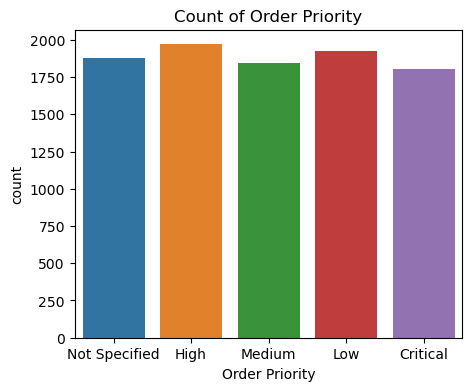

In [24]:
plt.figure(figsize=(5,4))
sns.countplot(x='Order Priority', data=df)
plt.title('Count of Order Priority')
plt.savefig('Count of Order Priority.jpg')
plt.show()

# please run save fig before plt.show otherwise picture will not be saved

# Ship Mode

In [26]:
df['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [28]:
x = df['Ship Mode'].value_counts().index
y = df['Ship Mode'].value_counts().values
x,y # just separating numeric and label names that we are going to use

(Index(['Regular Air', 'Delivery Truck', 'Express Air'], dtype='object', name='Ship Mode'),
 array([7036, 1283, 1107], dtype=int64))

<function matplotlib.pyplot.show(close=None, block=None)>

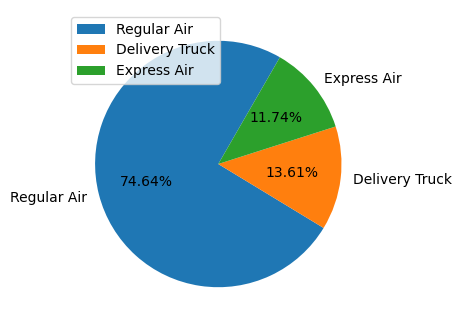

In [35]:
plt.figure(figsize=(5,4))
plt.pie(y, labels=x, startangle=60, autopct='%0.2f%%')
plt.legend(loc=2)
plt.show

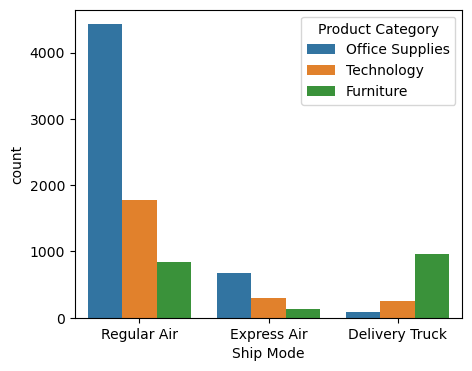

In [36]:
plt.figure(figsize=(5,4))
sns.countplot(x='Ship Mode', data=df, hue='Product Category')
plt.show()

# Customer Segment

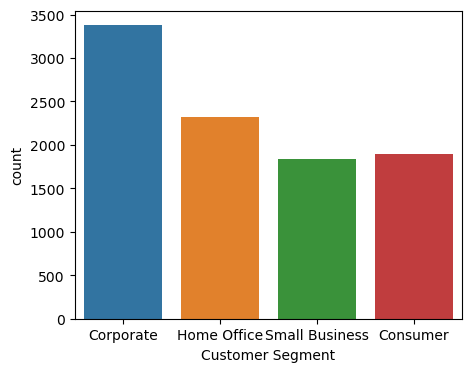

In [38]:
plt.figure(figsize=(5,4))
sns.countplot(x='Customer Segment', data=df)
plt.show()

# Product Category

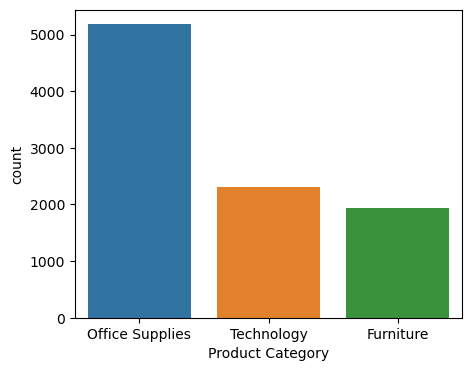

In [41]:
plt.figure(figsize=(5,4))
sns.countplot(x='Product Category', data=df)
plt.show()

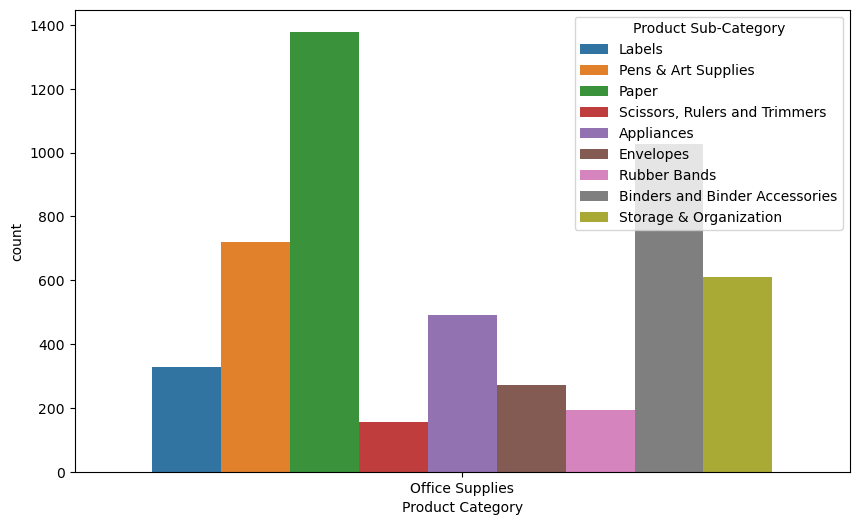

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category', data=df[df['Product Category']=='Office Supplies'], hue='Product Sub-Category')
plt.show()

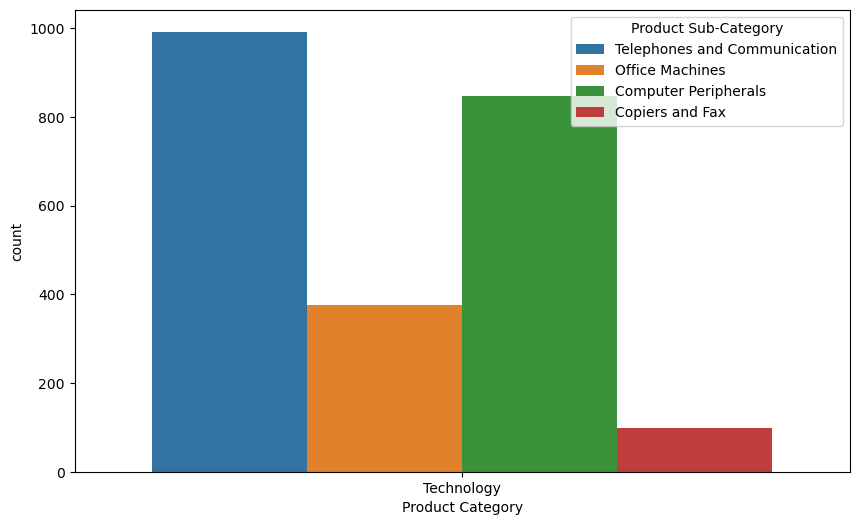

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category', data=df[df['Product Category']=='Technology'], hue='Product Sub-Category')
plt.show()

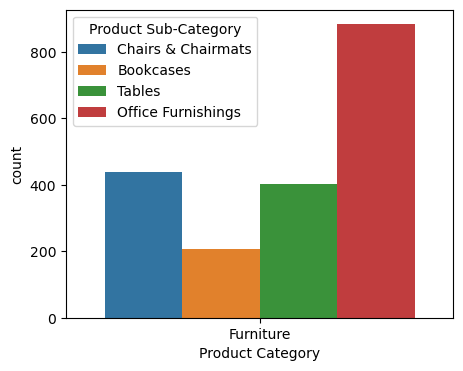

In [43]:
plt.figure(figsize=(5,4))
sns.countplot(x='Product Category', data=df[df['Product Category']=='Furniture'], hue='Product Sub-Category')
plt.show()

# Extra

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [50]:
df['Order Year'] = df['Order Date'].dt.year

In [52]:
df['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

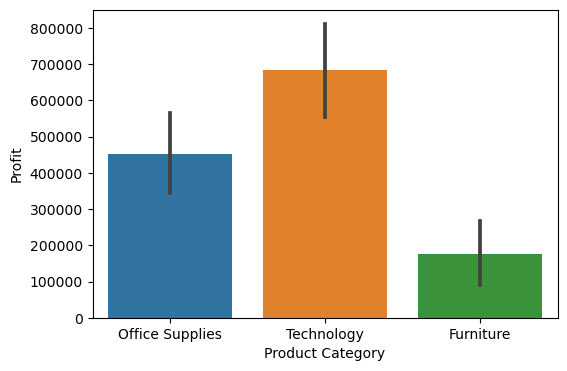

In [55]:
plt.figure(figsize=(6,4))
sns.barplot(x='Product Category', y='Profit', data=df, estimator='sum')
plt.show()

In [60]:
df['State or Province'].value_counts().head()

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

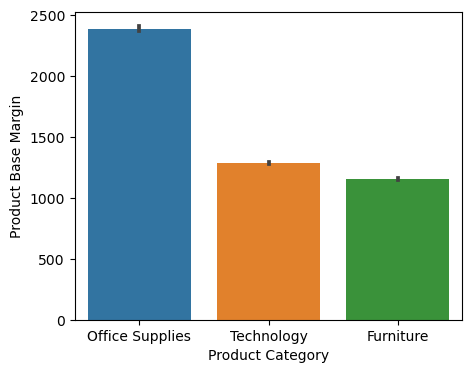

In [64]:
plt.figure(figsize=(5,4))
sns.barplot(x='Product Category',y='Product Base Margin', data=df, estimator='sum')
plt.show()